In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from functools import partial
from matplotlib.patches import Circle, Rectangle
import random
import sys
import os

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.filterwarnings("ignore",category=FutureWarning)

if "../workflow/scripts" not in sys.path:
    sys.path.insert(0, os.path.abspath("../../workflow/scripts"))
from plotting import plots

settings = "r100tc-100aINTERg0.99"

#RESULTS_DIR = f"{settings}"
# RESULTS/RESULTSNOTRAP/r100tc-100aINTERg0.99/a0/J_0.pickle
#df = pd.read_csv("a0/df_0.csv")


# start with 0-no-trap
condition = "1-trap"
PLOT_DIR= f"/home/paulina/Documents/thesis/figures/experiments/forward/{settings}/{condition}"
#PLOT_DIR = f"PLOTS/{settings}/{condition}"
#CONDITION_DIR = f"{RESULTS_DIR}/{condition}"
#AGENT_NUMBER = len(os.listdir(CONDITION_DIR))

agent_ids = [i for i in range(0,AGENT_NUMBER)]
#sample_ids = random.sample(agent_ids, min(AGENT_NUMBER, 5))

SAVE_PLOTS = False

if not os.path.exists(PLOT_DIR):
    os.makedirs(PLOT_DIR)
    print("Directory " , PLOT_DIR ,  " Created ")
else:    
    print("Directory " , PLOT_DIR ,  " already exists")


FileNotFoundError: [Errno 2] No such file or directory: 'r100tc-100aINTERg0.99/1-trap'

In [6]:
titles = {
  "0-no-trap": "trap covered",
  "1-trap": "trap uncovered",
  "2-no-trap": "trap covered again"
}

Environment

NameError: name 'SAVE_PLOTS' is not defined

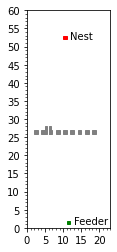

In [2]:
def centroid(data):
    x, y = zip(*data)
    l = len(x)
    return int(round(sum(x) / l)), int(round(sum(y) / l))

with open("../../Wystrach2020/env.pickle", 'rb') as env_pickled:
    env = pickle.load(env_pickled)
env['goal'] = centroid(env.pop('goals'))
env

ax = plt.subplot()
ax.set_xlim(0,env["width"])
ax.set_ylim(0,env["height"])
ax.set_aspect('equal')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

#ax.grid(which='both')

traps = env["traps"]
trap_exits = env["trap_exits"]

patches = [
    Rectangle(env["goal"], width=1, height=1, color='red'),
    Rectangle(env["start"], width=1, height=1, color='green'),
    *(Rectangle(trap, width=1, height=1, color='gray') for trap in traps[::2]),
    Rectangle(trap_exits[0][0], width=.5, height=2, color='gray'),
    Rectangle(trap_exits[1][0], width=.5, height=2, color='gray')
]

for patch in patches:
    ax.add_patch(patch)

ax.annotate('Feeder', (env['start'][0] + 2, env['start'][1]))
ax.annotate('Nest', (env['goal'][0] + 2, env['goal'][1]))
if SAVE_PLOTS:
    pass
    #plt.savefig(f"{PLOT_DIR}/environment_trap_squiqqly.svg")


In [8]:
def plot_line(data_name, title, xlabel, ylabel):
  SMOOTHING_FACTOR = 10

  data = []
  for i in agent_ids:
    with open(f"{CONDITION_DIR}/a{i}/{data_name}_{i}.pickle",'rb') as f_in:
      data.append(pickle.load(f_in))
  # Smoothing by Factor  
  data_tupls = []
  N = SMOOTHING_FACTOR
  for D in data:
    D = np.convolve(D, np.ones(N)/N, mode='valid')
    for idx, d in enumerate(D):
      data_tupls.append((idx,d))
  df_data = pd.DataFrame(data_tupls, columns = ['x', 'y'])

  sns.lineplot(data=df_data, x="x", y="y", ci='sd')
  ax = plt.gca()
  #ax.set_ylim(df_J.y.min(),df_J.y.max() +2)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)


Calculate cumulative discounted rewards

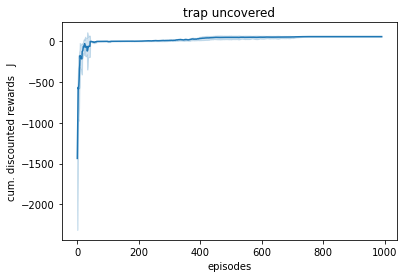

In [9]:
titles = {
  "0-no-trap": "trap covered",
  "1-trap": "trap uncovered",
  "2-no-trap": "trap covered again"
}


plt.clf()
plot_line(data_name='J', title=titles[condition] , xlabel='episodes', ylabel='cum. discounted rewards   J')


if SAVE_PLOTS:
  plt.savefig(f"{PLOT_DIR}/J.svg")

Episode Lengths

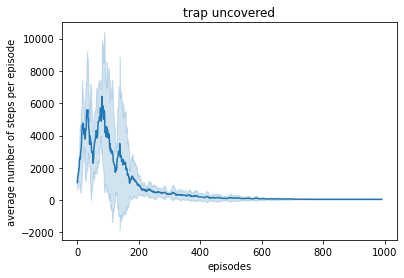

In [10]:
plt.clf()
plot_line(data_name='episode_lens', title=titles[condition] , xlabel='episodes', ylabel='average number of steps per episode')

if SAVE_PLOTS:
  plt.savefig(f"{PLOT_DIR}/episode_lens.svg")

Trajectories

In [11]:
samples = []
for idx, i in enumerate(agent_ids):
    df = pd.read_csv(f"{CONDITION_DIR}/a{i}/df_{i}.csv")
    samples.append(df)


last_trials = [ant_df[ant_df.trial_nb == ant_df.trial_nb.max()] for ant_df in samples]
#last_trials[0]

MANUALLY CHANGES CODE HERE TO ACCOUNT FOR SIMULATION ERROR OF WRONG STARTING POINT


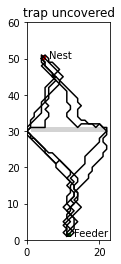

In [12]:
ax = plt.subplot()
ax.set_xlim(0,env["width"])
ax.set_ylim(0,env["height"])
ax.set_aspect('equal')

#traps = env["traps"]
#trap_exits = env["trap_exits"]

patches = [
    
    Rectangle(env["goal"], width=1, height=1, color='red'),
    #Rectangle((1,11), width=1, height=1, color='green')    
    Rectangle(env["start"], width=1, height=1, color='green') # wrong in simulation
    #Rectangle(trap_exits[0][0], width=.5, height=2, color='black'),
    #Rectangle(trap_exits[1][0], width=.5, height=2, color='black')
]
if condition=="1-trap":
    patches.extend([Rectangle(trap, width=1, height=1, color='lightgray') for trap in traps])
else:
    patches.extend([Rectangle(trap, width=1, height=1, color='lightgray') for trap in traps[::2]])
for patch in patches:
    ax.add_patch(patch)

ax.annotate('Feeder', (env['start'][0] + 2, env['start'][1]))
ax.annotate('Nest', (env['goal'][0] + 2, env['goal'][1]))
ax.set_title(titles[condition])
for ant_df in last_trials:
    plots.draw_trajectories_phil(ant_df, ax)
print("MANUALLY CHANGES CODE HERE TO ACCOUNT FOR SIMULATION ERROR OF WRONG STARTING POINT")
if SAVE_PLOTS:
    plt.savefig(f"{PLOT_DIR}/all_last_trajectories.svg")

# For all 30 agents

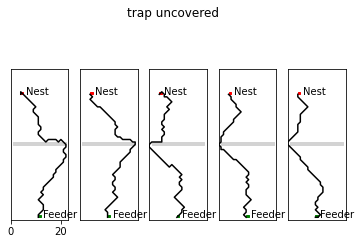

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=len(agent_ids), sharey=True) # sharey funktioniert nicht, frag mich nicht wieso - alles mögliche probiert
#figsize=(45, 5),
for idx, i in enumerate(agent_ids):
    df = pd.read_csv(f"{CONDITION_DIR}/a{i}/df_{i}.csv")
    df = df[df.trial_nb == df.trial_nb.max()]

    if idx == 0:
      ax = plt.subplot(1,len(agent_ids),idx+1)
      ax1 = ax
    else:
      ax = plt.subplot(1,len(agent_ids),idx+1)
      ax.set_yticks([])  # Diesen Befehl benutzen um alle Axen zu entfernen
      ax.set_xticks([])  # Diesen Befehl benutzen um alle Axen zu entfernen
      
    ax.set_xlim(0,env["width"])
    ax.set_ylim(0,env["height"])
    ax.set_aspect('equal')


    patches = [
    Rectangle(env["goal"], width=1, height=1, color='red'),
    Rectangle(env["start"], width=1, height=1, color='green')    
    ]
    if condition=="1-trap":
      patches.extend([Rectangle(trap, width=1, height=1, color='lightgray') for trap in traps])
    else:
      patches.extend([Rectangle(trap, width=1, height=1, color='lightgray') for trap in traps[::2]])
    for patch in patches:
      ax.add_patch(patch)

    ax.annotate('Feeder', (env['start'][0] + 2, env['start'][1]))
    ax.annotate('Nest', (env['goal'][0] + 2, env['goal'][1]))

    plots.draw_trajectories_phil(df, ax)
plt.suptitle(titles[condition])
if SAVE_PLOTS:
    plt.savefig(f"{PLOT_DIR}/last_trajectories_sample.svg")

## TD errors (take the NS one) averaged over all agents

In [14]:
tds_ns_list = []
for i in agent_ids:
  with open(f"{CONDITION_DIR}/a{i}/tds_ns_{i}.npy",'rb') as f_in:
    tds_ns_list.append(np.load(f_in))
# creating mean over all agents
all_agent_mean_tds_ns = np.array(tds_ns_list).mean(axis=0)

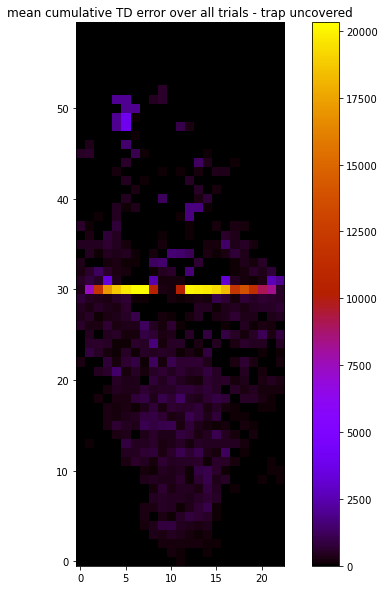

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(all_agent_mean_tds_ns[::-1], origin='lower', cmap="gnuplot")
#plt.title("Mean TD error over all agents and all trials")
plt.title(f"mean cumulative TD error over all trials - {titles[condition]}")
plt.colorbar()
if SAVE_PLOTS:
    plt.savefig(f"{PLOT_DIR}/td_error.svg")


## Heatmap of Trajectories of all agents on trials 

<Figure size 432x288 with 0 Axes>

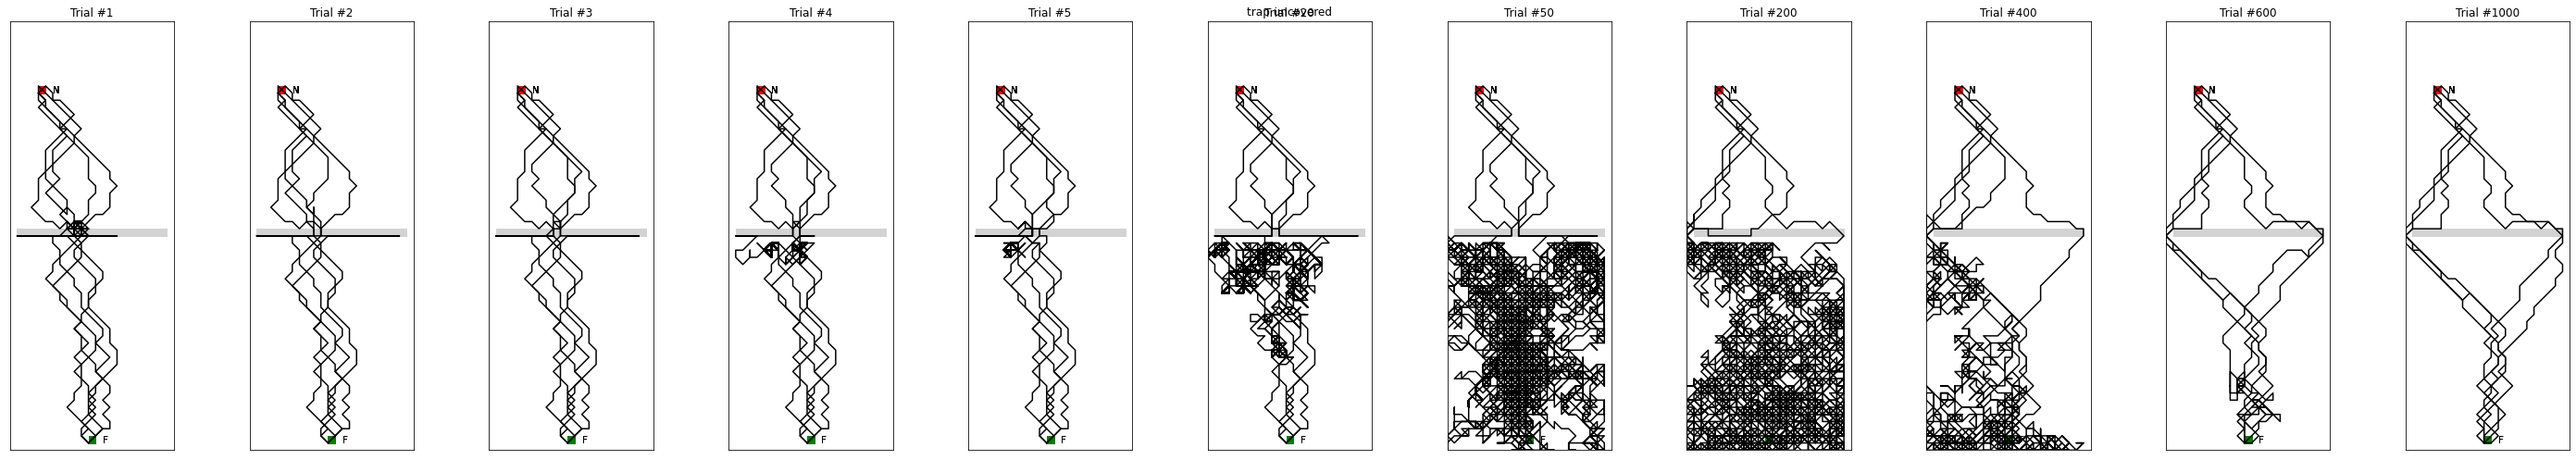

In [16]:
plt.clf()
trial_samples = [1,2,3,4,5,20,50,200,400,600,1000]# 250, 500, 750, 1000]
fig, axs = plt.subplots(nrows=1, ncols=len(trial_samples), sharey=True, figsize=(40, 7))
#cs = iter(cm.rainbow(np.linspace(0, 1, len(trial_samples))))

for df_ant in samples:
  # per ant
  for idx,trial_sample in enumerate(trial_samples):

    df_subsample = df_ant[df_ant.trial_nb == trial_sample-1]
    ax = axs[idx]#plt.subplot(1,len(trial_samples),idx+1)
    plt.sca(ax)
    plots.draw_trajectories_phil(df_subsample, ax)

    ax.set_xlim(0,env["width"])
    ax.set_ylim(0,env["height"])
    ax.set_aspect('equal')
    ax.set_title(f"Trial #{trial_sample}")
    ax.set_xticks([])
    ax.set_yticks([])

    patches = [
    Rectangle(env["goal"], width=1, height=1, color='red'),
    Rectangle(env["start"], width=1, height=1, color='green')    
    ]
    if condition=="1-trap":
      patches.extend([Rectangle(trap, width=1, height=1, color='lightgray') for trap in traps])
    else:
      patches.extend([Rectangle(trap, width=1, height=1, color='lightgray') for trap in traps[::2]])

    for patch in patches:
      ax.add_patch(patch)    
    ax.annotate('F', (env['start'][0] + 2, env['start'][1]))
    ax.annotate('N', (env['goal'][0] + 2, env['goal'][1]))
plt.tight_layout()
plt.suptitle(titles[condition])

if SAVE_PLOTS:
    plt.savefig(f"{PLOT_DIR}/Traj_all_trials.svg")

## Heatmap of Trials

In [17]:
#plots.draw_traj_heat(df_subsample)


### Next line takes a while, generating 30 heatmaps over all 1000 trials. It depicts the averaged visits of each field for each ant (per plot) over all trials.

<Figure size 432x288 with 0 Axes>

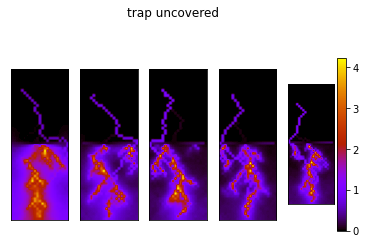

In [18]:
# prep heatmap
plt.clf()
max_x = env["height"]
max_y = env["width"]

sample_dfs = [samples[a] for a in agent_ids]

runs = pd.unique(sample_dfs[0]["trial_nb"]) # all

fig, axs = plt.subplots(nrows=1, ncols=len(sample_dfs), sharey=True)

for idx, ant_df in enumerate(sample_dfs):
  ax = axs[idx]
  
  ax.set_yticks([])
  ax.set_xticks([])

  plt.sca(ax)
  

  sur_map = np.zeros((max_x, max_y))
  for run in runs:
    
    traj = ant_df[ant_df.trial_nb == run]
    #sur_map = np.zeros((max_x+1, max_y+1))

    y_vals = list(traj['path_x'])
    x_vals = list(traj['path_y'])

    for i in range(0, len(x_vals)):
      sur_map[x_vals[i]][y_vals[i]] += 1

    #print(sur_map)

  sur_map /= len(runs)
    
  plt.imshow(sur_map, origin='lower', cmap="gnuplot")
plt.colorbar()
plt.suptitle(titles[condition])

if SAVE_PLOTS:
  plt.savefig(f"{PLOT_DIR}/heatmap_agent-wise_mean_0.svg")

<Figure size 432x288 with 0 Axes>

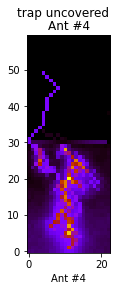

In [19]:
plt.clf()
# prep heatmap
max_x = env["height"]
max_y = env["width"]

sub_sample = [samples[i] for i in agent_ids]

fig, ax = plt.subplots() #(nrows=1, ncols=len(sub_sample),  figsize=(15, 15), sharey=True)
sur_map = np.zeros((max_x, max_y))

for idx, ant_df in enumerate(sub_sample):

  ax.title.set_text(f"Ant #{agent_ids[idx]}")
  ax.set_xlabel(f"Ant #{agent_ids[idx]}")

  runs = pd.unique(ant_df["trial_nb"])
  for run in runs:
    
    traj = ant_df[ant_df.trial_nb == run]
    #sur_map = np.zeros((max_x+1, max_y+1))

    y_vals = list(traj['path_x'])
    x_vals = list(traj['path_y'])

    for i in range(0, len(x_vals)):
      sur_map[x_vals[i]][y_vals[i]] += 1

    #print(sur_map)

  sur_map /= len(runs)
    
  plt.imshow(sur_map, origin='lower', cmap="gnuplot") #[::-1]
#ax.invert_yaxis()
plt.suptitle(titles[condition])

if SAVE_PLOTS:
  plt.savefig(f"{PLOT_DIR}/Heatmap_Three_Agents_Traj_0.svg")

# Heatmap of sampled trials for ALL ANTS

Text(0.5, 0.98, 'trap uncovered')

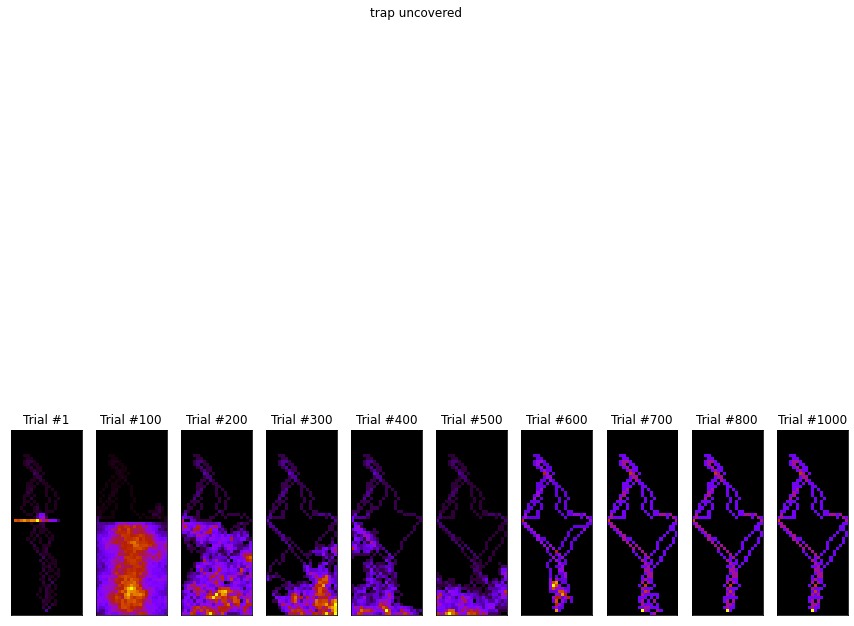

In [20]:
# prep heatmap
max_x = env["height"]
max_y = env["width"]

trial_samples = [1, 100, 200, 300, 400, 500, 600, 700, 800, 1000]
fig, axs = plt.subplots(nrows=1, ncols=len(trial_samples),  figsize=(15, 15), sharey=True) 
#cs = iter(cm.rainbow(np.linspace(0, 1, len(trial_samples))))
  
for idx,trial_sample in enumerate(trial_samples):
  sur_map = np.zeros((max_x, max_y))
  for df_ant in samples:
    #ax = plt.subplot(1,len(trial_samples),idx+1)
    ax = axs[idx]
    plt.sca(ax)
    ax.set_yticks([])
    ax.title.set_text(f"Trial #{trial_samples[idx]}")
    ax.set_xticks([])
    
    df_subsample = df_ant[df_ant.trial_nb == trial_sample-1]
    traj = df_subsample
    y_vals = list(traj['path_x'])
    x_vals = list(traj['path_y'])

    for i in range(0, len(x_vals)):
      sur_map[x_vals[i]][y_vals[i]] += 1

    plt.imshow(sur_map[::-1], origin='upper', cmap="gnuplot")
plt.suptitle(titles[condition])

#if SAVE_PLOTS:#
#  plt.savefig(f"{PLOT_DIR}/{condition}/Heatmap_sampled-trial_all-agents.svg")

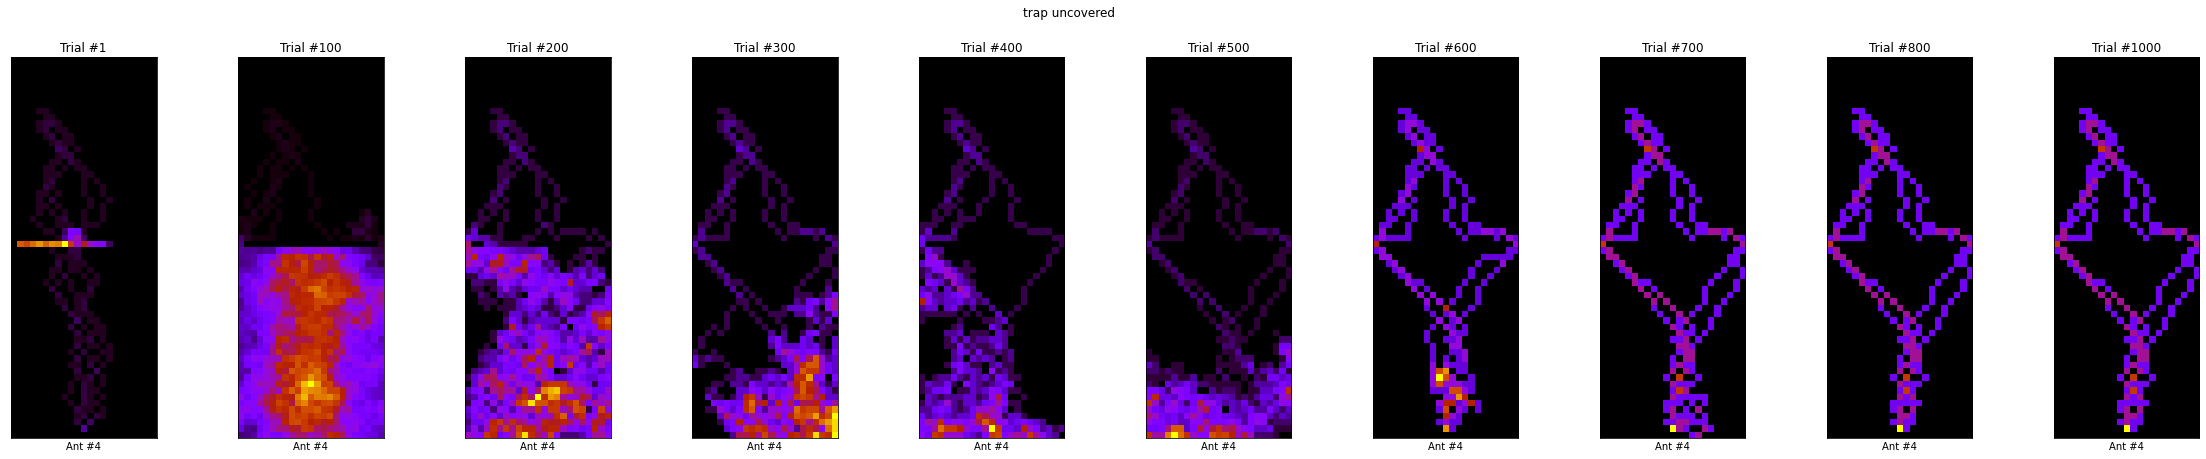

In [21]:
# prep heatmap
max_x = env["height"]
max_y = env["width"]

sub_sample = [samples[i-1] for i in agent_ids]
trial_samples = [1, 100, 200, 300, 400, 500, 600, 700, 800, 1000]
fig, axs = plt.subplots(nrows=1, ncols=len(trial_samples), sharey=True, figsize=(40, 7))
#cs = iter(cm.rainbow(np.linspace(0, 1, len(trial_samples))))

for idx,trial_sample in enumerate(trial_samples):
  # each ant's path is drawn into all plots
  ax = axs[idx]
  plt.sca(ax)
  sur_map = np.zeros((max_x, max_y))
  for ix, df_ant in enumerate(sub_sample):
    df_subsample = df_ant[df_ant.trial_nb == trial_sample-1]

    #ax = plt.subplot(len(sub_sample),len(trial_samples),ix*10+idx+1)
    ax.title.set_text(f"Trial #{trial_samples[idx]}")
    ax.set_xlabel(f"Ant #{agent_ids[ix]}")
    ax.set_xticks([])
    ax.set_yticks([])


    traj = df_subsample
    y_vals = list(traj['path_x'])
    x_vals = list(traj['path_y'])

    for i in range(0, len(x_vals)):
      sur_map[x_vals[i]][y_vals[i]] += 1

    plt.imshow(sur_map[::-1], origin='upper', cmap="gnuplot")
plt.suptitle(titles[condition])
if SAVE_PLOTS:  
  plt.savefig(f"{PLOT_DIR}/Heatmap_3-Ants_Sampled-trials_0.svg")

## Value Function

### Mean over all agents

In [22]:
value_list = []
for i in agent_ids:
  with open(f"{CONDITION_DIR}/a{i}/value_fun_{i}.npy",'rb') as f_in:
    value_list.append(np.load(f_in))
# creating mean over all agents
all_agent_mean_value = np.array(value_list).mean(axis=0)

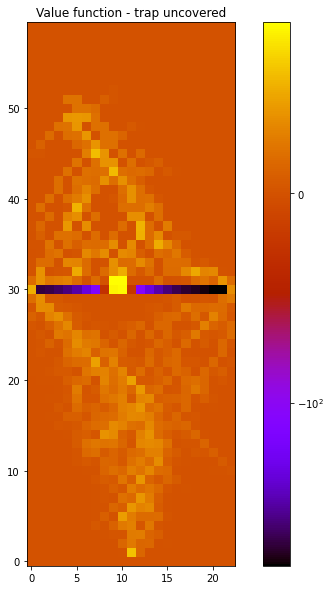

In [23]:
from matplotlib.colors import SymLogNorm
plt.figure(figsize=(10,10))
plt.imshow(all_agent_mean_value[::-1], origin='lower', cmap="gnuplot", norm=SymLogNorm(100))
plt.title(f"Value function - {titles[condition]}")
plt.colorbar()
if SAVE_PLOTS:
    plt.savefig(f"{PLOT_DIR}/Value_Func_Mean.svg")

### Of individual agents

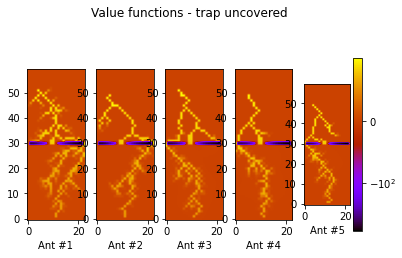

In [24]:
# prep heatmap
max_x = env["height"]
max_y = env["width"]

fig, ax = plt.subplots(nrows=1, ncols=len(samples), sharey=True)#, figsize=(45, 5))
for idx, value in enumerate(value_list):

  if idx == 0:
    ax = plt.subplot(1,len(samples),idx+1)
    ax1 = ax
  else:
    ax = plt.subplot(1,len(samples),idx+1, sharey=ax1)
    #ax.set_yticks([])

  ax.set_xlabel(f"Ant #{idx+1}")

  plt.imshow(value[::-1], origin='lower', cmap="gnuplot", norm=SymLogNorm(100))
plt.colorbar()

plt.suptitle(f"Value functions - {titles[condition]}")
if SAVE_PLOTS:
  plt.savefig(f"{PLOT_DIR}/{condition}/Value_Func_Per-Agent.svg")

In [41]:
value.shape

(60, 23)

In [25]:
q_list = []
for i in [0]:#sample_ids:
  with open(f"{CONDITION_DIR}/a{i}/q_{i}.npy",'rb') as f_in:
    q_list.append(np.load(f_in))


In [40]:
q_vals = q_list[0]


def max_direction(state):
    return np.array(INTERCARDINALS[np.argmax(state)]) * np.max(state)


qs = np.apply_along_axis(max_direction, 1, q_vals)
qs.shape

[0.14024569 0.13763876 0.13646569 0.13513644 0.13742177 0.137422
 0.13999312 0.14499908]
7
(1, 1)


(1380, 2)

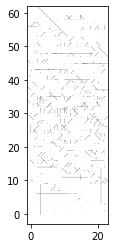

In [51]:
qs_resh = np.reshape(qs, (60,23,2))
U = qs_resh[:,:,0]
V = qs_resh[:,:,1]

fig, ax = plt.subplots()
q = ax.quiver(U, V)
ax.set_aspect('equal')

plt.show()

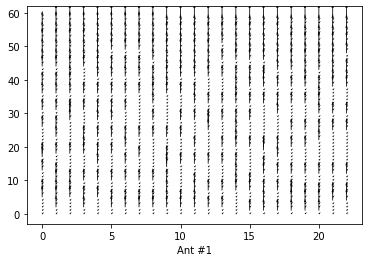

In [36]:
INTERCARDINALS = ((1, 0), (0, 1), (-1, 0), (0, -1), (-1,-1), (-1,1), (1,-1), (1,1))

def convert_to_grid(state, width):
        return np.array([state[0] // width, state[0] % width])


fig, ax = plt.subplots(nrows=1, ncols=len(q_list), sharey=True)
for idx, data in enumerate(q_list):

  if idx == 0:
    ax = plt.subplot(1,len(q_list),idx+1)
    ax1 = ax
  else:
    ax = plt.subplot(1,len(q_list),idx+1, sharey=ax1)
  ax.set_xlabel(f"Ant #{idx+1}")

  data_max = np.empty(len(data[:,0]), dtype=tuple)
  for idx, val in enumerate(data):
      if len(set(val))==1:
          data_max[idx] = INTERCARDINALS[0]
      else:
          data_max[idx] = np.array(INTERCARDINALS[np.argmax(q_vals[0])]) * np.max(q_vals[0])#tuple([max(val)*x for x in INTERCARDINALS[np.argmax(val)]])

  data_3d = np.reshape(data_max, (env['height'] , env['width'])) #len(INTERCARDINALS)
  x_direct = np.array([a for a,b in data_max], dtype='float64')
  y_direct = np.array([b for a,b in data_max], dtype='float64')

  x = np.arange(0,len(data_3d[0,:]), 1)
  y = np.arange(0,len(data_3d[:]), 1)

  X, Y = np.meshgrid(x, y)
  u, v = x_direct, y_direct

  ax.quiver(X,Y,v,u)
  #ax.axis([-6, 6, -6, 6])
  #ax.set_aspect('equal')

